In [172]:
import os
import requests
import zipfile
import pandas as pd
import yfinance as yf
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import seaborn as sns


In [173]:
urls = {
    'annual_2018': 'https://www.cftc.gov/files/dea/history/dea_fut_xls_2018.zip',
    'annual_2019': 'https://www.cftc.gov/files/dea/history/dea_fut_xls_2019.zip',
    'annual_2020': 'https://www.cftc.gov/files/dea/history/dea_fut_xls_2020.zip',
    'annual_2021': 'https://www.cftc.gov/files/dea/history/dea_fut_xls_2021.zip',
    'annual_2022': 'https://www.cftc.gov/files/dea/history/dea_fut_xls_2022.zip',
    'annual_2023': 'https://www.cftc.gov/files/dea/history/dea_fut_xls_2023.zip',
    'annual_2024': 'https://www.cftc.gov/files/dea/history/dea_fut_xls_2024.zip'
}

In [174]:
extracted_dir = 'data'
os.makedirs(extracted_dir, exist_ok=True)

In [175]:
for name, url in urls.items():
    zip_file_path = f'{name}.zip'

    response = requests.get(url)
    response.raise_for_status()
    with open(zip_file_path, 'wb') as file:
        file.write(response.content)

    with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
        for member in zip_ref.namelist():
            filename = os.path.basename(member)
            if filename:
                extracted_file_path = os.path.join(extracted_dir, f'{name}_{filename}')
                with zip_ref.open(member) as source, open(extracted_file_path, 'wb') as target:
                    target.write(source.read())

    os.remove(zip_file_path)

print(f"The files have been downloaded and saved in the directory '{extracted_dir}'.")

The files have been downloaded and saved in the directory 'data'.


In [176]:
end_date = datetime.today()
start_date = "2018-01-01"  

data_eurusd = yf.download(
    "EURUSD=X",
    start=start_date,  
    end=end_date.strftime('%Y-%m-%d'),  
    interval="1d"
)

file_path = "data/eurusd_daily_data.csv"
data_eurusd.to_csv(file_path)

print(f"Data saved to {file_path}")

[*********************100%***********************]  1 of 1 completed

Data saved to data/eurusd_daily_data.csv


In [177]:
dfs = []
for file in os.listdir(extracted_dir):
    if file.endswith('.xls'):
        file_path = os.path.join(extracted_dir, file)
        df = pd.read_excel(file_path)
        dfs.append(df)

mdf = pd.concat(dfs, ignore_index=True)
output_csv_path = 'data/annual_merged_data.csv'
mdf.to_csv(output_csv_path, index=False)

print(f"The files have been downloaded, linked and saved as '{output_csv_path}'.")

The files have been downloaded, linked and saved as 'data/annual_merged_data.csv'.


In [178]:
file_path = "data/annual_merged_data.csv"
cot_data = pd.read_csv(file_path)

print("Column Names:")
print(cot_data.columns.tolist())

Column Names:
['Market_and_Exchange_Names', 'As_of_Date_In_Form_YYMMDD', 'Report_Date_as_MM_DD_YYYY', 'CFTC_Contract_Market_Code', 'CFTC_Market_Code', 'CFTC_Region_Code', 'CFTC_Commodity_Code', 'Open_Interest_All', 'NonComm_Positions_Long_All', 'NonComm_Positions_Short_All', 'NonComm_Postions_Spread_All', 'Comm_Positions_Long_All', 'Comm_Positions_Short_All', 'Tot_Rept_Positions_Long_All', 'Tot_Rept_Positions_Short_All', 'NonRept_Positions_Long_All', 'NonRept_Positions_Short_All', 'Open_Interest_Old', 'NonComm_Positions_Long_Old', 'NonComm_Positions_Short_Old', 'NonComm_Positions_Spread_Old', 'Comm_Positions_Long_Old', 'Comm_Positions_Short_Old', 'Tot_Rept_Positions_Long_Old', 'Tot_Rept_Positions_Short_Old', 'NonRept_Positions_Long_Old', 'NonRept_Positions_Short_Old', 'Open_Interest_Other', 'NonComm_Positions_Long_Other', 'NonComm_Positions_Short_Other', 'NonComm_Positions_Spread_Other', 'Comm_Positions_Long_Other', 'Comm_Positions_Short_Other', 'Tot_Rept_Positions_Long_Other', 'Tot_Re

In [179]:
unique_values_cot = cot_data['Market_and_Exchange_Names'].unique()
print(unique_values_cot)

['WHEAT-SRW - CHICAGO BOARD OF TRADE'
 'BLACK SEA WHEAT FINANCIAL - CHICAGO BOARD OF TRADE'
 'WHEAT-HRW - CHICAGO BOARD OF TRADE'
 'WHEAT-HRSpring - MINNEAPOLIS GRAIN EXCHANGE'
 'CORN - CHICAGO BOARD OF TRADE' 'OATS - CHICAGO BOARD OF TRADE'
 'SOYBEANS - CHICAGO BOARD OF TRADE'
 'MINI SOYBEANS - CHICAGO BOARD OF TRADE'
 'NJ SRECS VINTAGE 2018 - ICE FUTURES ENERGY DIV'
 'CALIF CARBON ALL VINTAGE 2017 - ICE FUTURES ENERGY DIV'
 'CALIF CARBON ALL VINTAGE 2018 - ICE FUTURES ENERGY DIV'
 'NJ SRECS VINTAGE 2019 - ICE FUTURES ENERGY DIV'
 'NJ SRECS VINTAGE 2020 - ICE FUTURES ENERGY DIV'
 'PJM TRI-RECs CLASS 1 Vin 2018 - ICE FUTURES ENERGY DIV'
 'PJM TRI-RECs CLASS 1 Vin 2019 - ICE FUTURES ENERGY DIV'
 'PJM TRI-RECs CLASS 1 Vin 2020 - ICE FUTURES ENERGY DIV'
 'RGGI VINTAGE 2017 - ICE FUTURES ENERGY DIV'
 'CALIF CARBON ALL VINTAGE 2019 - ICE FUTURES ENERGY DIV'
 'PJM TRI-RECs CLASS 1 Vin 2021 - ICE FUTURES ENERGY DIV'
 'NJ SRECS VINTAGE 2021 - ICE FUTURES ENERGY DIV'
 'RGGI VINTAGE 2018 - ICE F

In [180]:
filtered_data = cot_data[cot_data['Market_and_Exchange_Names'] == 'EURO FX - CHICAGO MERCANTILE EXCHANGE']

filtered_file_path = "data/cot_eur.csv"
filtered_data.to_csv(filtered_file_path, index=False)

print(f"Filtered data saved to {filtered_file_path}")

Filtered data saved to data/cot_eur.csv


In [181]:
cot_eur_data = pd.read_csv(filtered_file_path)
cot_eur_data.head()

,Market_and_Exchange_Names,As_of_Date_In_Form_YYMMDD,Report_Date_as_MM_DD_YYYY,CFTC_Contract_Market_Code,CFTC_Market_Code,CFTC_Region_Code,CFTC_Commodity_Code,Open_Interest_All,NonComm_Positions_Long_All,NonComm_Positions_Short_All,...,Conc_Net_LE_8_TDR_Short_Old,Conc_Gross_LE_4_TDR_Long_Other,Conc_Gross_LE_4_TDR_Short_Other,Conc_Gross_LE_8_TDR_Long_Other,Conc_Gross_LE_8_TDR_Short_Other,Conc_Net_LE_4_TDR_Long_Other,Conc_Net_LE_4_TDR_Short_Other,Conc_Net_LE_8_TDR_Long_Other,Conc_Net_LE_8_TDR_Short_Other,Contract_Units
0,EURO FX - CHICAGO MERCANTILE EXCHANGE,181231,2018-12-31,99741,CME,0,99,505986,148288,194936,...,44.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"(CONTRACTS OF EUR 125,000)"
1,EURO FX - CHICAGO MERCANTILE EXCHANGE,181224,2018-12-24,99741,CME,0,99,508253,139059,197514,...,44.7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"(CONTRACTS OF EUR 125,000)"
2,EURO FX - CHICAGO MERCANTILE EXCHANGE,181218,2018-12-18,99741,CME,0,99,505711,147654,200778,...,43.9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"(CONTRACTS OF EUR 125,000)"
3,EURO FX - CHICAGO MERCANTILE EXCHANGE,181211,2018-12-11,99741,CME,0,99,613745,146082,202369,...,32.6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"(CONTRACTS OF EUR 125,000)"
4,EURO FX - CHICAGO MERCANTILE EXCHANGE,181204,2018-12-04,99741,CME,0,99,545537,144859,205635,...,37.4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"(CONTRACTS OF EUR 125,000)"


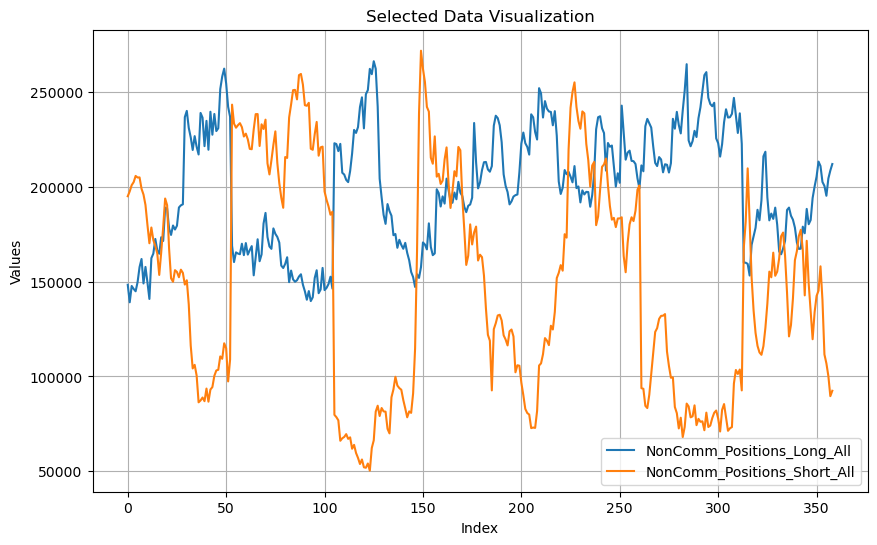

In [182]:
columns_to_plot = ['NonComm_Positions_Long_All', 'NonComm_Positions_Short_All']  

plt.figure(figsize=(10, 6))
for column in columns_to_plot:
    if column in cot_eur_data.columns:
        plt.plot(cot_eur_data[column], label=column)

plt.title("Selected Data Visualization")
plt.xlabel("Index")
plt.ylabel("Values")
plt.legend()
plt.grid()
plt.show()

In [183]:
eur_csv_path = 'data/cot_eur.csv'
df_eur_cot = pd.read_csv(eur_csv_path)

df_eur_cot['Report_Date_as_MM_DD_YYYY'] = pd.to_datetime(df_eur_cot['Report_Date_as_MM_DD_YYYY'])

eurusd_csv_path = 'data/eurusd_daily_data.csv'
df_eurusd = pd.read_csv(eurusd_csv_path)

df_eurusd['Date'] = pd.to_datetime(df_eurusd['Date'])

df_merged = pd.merge(df_eur_cot, df_eurusd, left_on='Report_Date_as_MM_DD_YYYY', right_on='Date', how='left')
df_merged = df_merged.drop(columns=['Date'])

output_csv_path = 'data/merged_eurusd_cot.csv'
df_merged.to_csv(output_csv_path, index=False)

df_merged = df_merged.sort_values(by='Report_Date_as_MM_DD_YYYY').reset_index(drop=True)

In [185]:
df_merged.head()

,Market_and_Exchange_Names,As_of_Date_In_Form_YYMMDD,Report_Date_as_MM_DD_YYYY,CFTC_Contract_Market_Code,CFTC_Market_Code,CFTC_Region_Code,CFTC_Commodity_Code,Open_Interest_All,NonComm_Positions_Long_All,NonComm_Positions_Short_All,...,Conc_Net_LE_4_TDR_Short_Other,Conc_Net_LE_8_TDR_Long_Other,Conc_Net_LE_8_TDR_Short_Other,Contract_Units,Open,High,Low,Close,Adj Close,Volume
0,EURO FX - CHICAGO MERCANTILE EXCHANGE,180102,2018-01-02,99741,CME,0,99,542622,236808,108940,...,0.0,0.0,0.0,"(CONTRACTS OF EUR 125,000)",1.201086,1.208094,1.200855,1.201158,1.201158,0
1,EURO FX - CHICAGO MERCANTILE EXCHANGE,180109,2018-01-09,99741,CME,0,99,563400,242053,97362,...,0.0,0.0,0.0,"(CONTRACTS OF EUR 125,000)",1.196960,1.197576,1.191796,1.197046,1.197046,0
2,EURO FX - CHICAGO MERCANTILE EXCHANGE,180116,2018-01-16,99741,CME,0,99,594038,254344,114854,...,0.0,0.0,0.0,"(CONTRACTS OF EUR 125,000)",1.226994,1.228124,1.219676,1.226843,1.226843,0
3,EURO FX - CHICAGO MERCANTILE EXCHANGE,180123,2018-01-23,99741,CME,0,99,608683,262175,117458,...,0.0,0.0,0.0,"(CONTRACTS OF EUR 125,000)",1.225731,1.230700,1.222359,1.225625,1.225625,0
4,EURO FX - CHICAGO MERCANTILE EXCHANGE,180130,2018-01-30,99741,CME,0,99,603460,258022,109280,...,0.0,0.0,0.0,"(CONTRACTS OF EUR 125,000)",1.238175,1.245221,1.233685,1.238114,1.238114,0


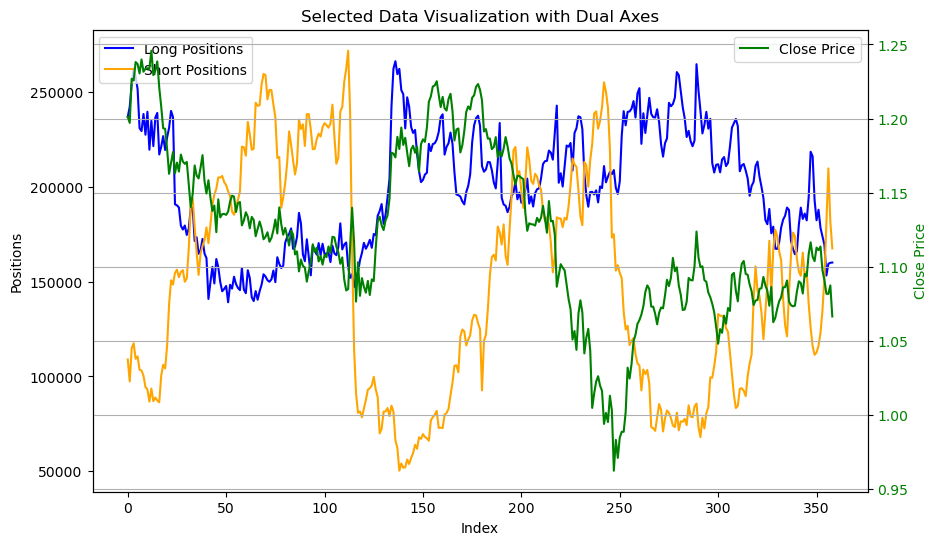

In [186]:
long_positions = df_merged['NonComm_Positions_Long_All']
short_positions = df_merged['NonComm_Positions_Short_All']
close_prices = df_merged['Close']

fig, ax1 = plt.subplots(figsize=(10, 6))

# Use the index and the data directly
ax1.plot(df_merged.index, long_positions, label='Long Positions', color='blue')
ax1.plot(df_merged.index, short_positions, label='Short Positions', color='orange')
ax1.set_xlabel('Index')
ax1.set_ylabel('Positions', color='black')
ax1.tick_params(axis='y', labelcolor='black')
ax1.legend(loc='upper left')

ax2 = ax1.twinx()
ax2.plot(df_merged.index, close_prices, label='Close Price', color='green')
ax2.set_ylabel('Close Price', color='green')
ax2.tick_params(axis='y', labelcolor='green')
ax2.legend(loc='upper right')

plt.title("Selected Data Visualization with Dual Axes")
plt.grid()

plt.show()


In [187]:
last_row = df_merged.iloc[-1][['Report_Date_as_MM_DD_YYYY', 'NonComm_Positions_Long_All', 'NonComm_Positions_Short_All', 'Close']]
print(last_row)

Report_Date_as_MM_DD_YYYY      2024-11-12 00:00:00
NonComm_Positions_Long_All                  160003
NonComm_Positions_Short_All                 167440
Close                                     1.066439
Name: 358, dtype: object


C:\Users\48666\anaconda3\Lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


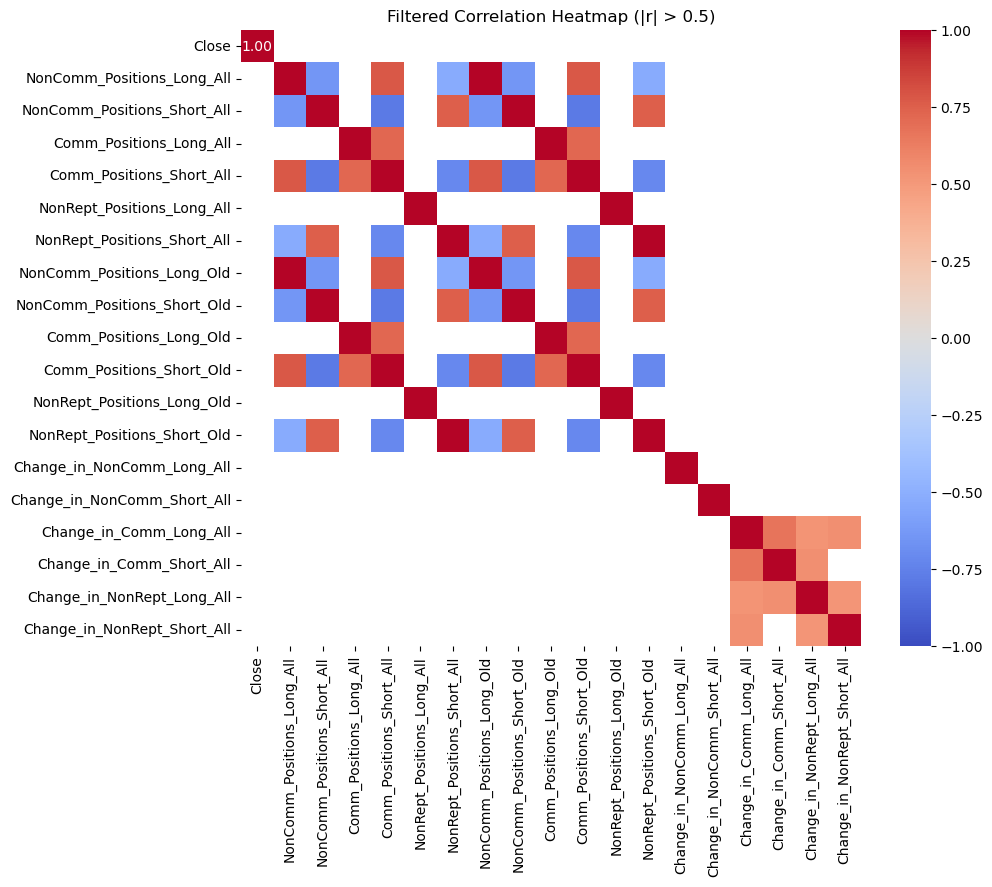

In [188]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define the columns to check
columns_to_check = [
    'Close',
    'NonComm_Positions_Long_All',
    'NonComm_Positions_Short_All',
    'Comm_Positions_Long_All',
    'Comm_Positions_Short_All',
    'NonRept_Positions_Long_All',
    'NonRept_Positions_Short_All',
    'NonComm_Positions_Long_Old',
    'NonComm_Positions_Short_Old',
    'Comm_Positions_Long_Old',
    'Comm_Positions_Short_Old',
    'NonRept_Positions_Long_Old',
    'NonRept_Positions_Short_Old',
    'Change_in_NonComm_Long_All',
    'Change_in_NonComm_Short_All',
    'Change_in_Comm_Long_All',
    'Change_in_Comm_Short_All',
    'Change_in_NonRept_Long_All',
    'Change_in_NonRept_Short_All'
]

# Select relevant columns and drop missing values
df_correlation = df_merged[columns_to_check]
df_correlation = df_correlation.dropna()

# Compute the correlation matrix
correlation_matrix = df_correlation.corr()

# Create a mask for correlations between -0.5 and 0.5
mask = (correlation_matrix > -0.5) & (correlation_matrix < 0.5)

# Apply the mask to the correlation matrix
filtered_correlation = correlation_matrix.mask(mask)

# Plot the heatmap
plt.figure(figsize=(10, 8))  # Adjust figure size as needed
sns.heatmap(
    filtered_correlation, 
    annot=True, 
    cmap="coolwarm", 
    fmt=".2f", 
    cbar=True, 
    mask=mask, 
    vmin=-1, 
    vmax=1
)
plt.title("Filtered Correlation Heatmap (|r| > 0.5)")
plt.show()


## unsupervised learning

In [189]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import os
from sklearn.metrics import silhouette_score


In [190]:
columns_to_use = [
    'NonComm_Positions_Long_All', 'NonComm_Positions_Short_All', 'Comm_Positions_Long_All',
    'Comm_Positions_Short_All', 'NonRept_Positions_Long_All', 'NonRept_Positions_Short_All',
    'NonComm_Positions_Long_Old', 'NonComm_Positions_Short_Old', 'Comm_Positions_Long_Old',
    'Comm_Positions_Short_Old', 'NonRept_Positions_Long_Old', 'NonRept_Positions_Short_Old',
    'Change_in_NonComm_Long_All', 'Change_in_NonComm_Short_All', 'Change_in_Comm_Long_All',
    'Change_in_Comm_Short_All', 'Change_in_NonRept_Long_All', 'Change_in_NonRept_Short_All',
    'Close'
]

df_unsupervised = df_merged[columns_to_use].dropna()

scaler = StandardScaler()
data_scaled = scaler.fit_transform(df_unsupervised)

C:\Users\48666\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


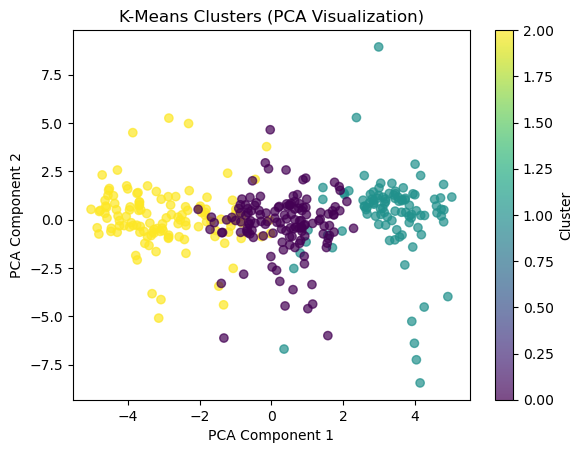

In [191]:
os.environ["OMP_NUM_THREADS"] = "1"

kmeans = KMeans(n_clusters=3, random_state=42, n_init=10) 
clusters = kmeans.fit_predict(data_scaled)

df_unsupervised['Cluster'] = clusters

pca = PCA(n_components=2)
data_pca = pca.fit_transform(data_scaled)

plt.scatter(data_pca[:, 0], data_pca[:, 1], c=clusters, cmap='viridis', alpha=0.7)
plt.title('K-Means Clusters (PCA Visualization)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar(label='Cluster')
plt.show()

In [192]:
# Group by cluster and calculate mean for each feature
cluster_summary = df_unsupervised.groupby('Cluster').mean()
print(cluster_summary)


         NonComm_Positions_Long_All  NonComm_Positions_Short_All  \
Cluster                                                            
0                     195846.274074                164454.896296   
1                     168404.666667                201054.323232   
2                     227247.640000                 90103.640000   

         Comm_Positions_Long_All  Comm_Positions_Short_All  \
Cluster                                                      
0                  378702.874074             437492.370370   
1                  264979.393939             256350.858586   
2                  359546.336000             545298.392000   

         NonRept_Positions_Long_All  NonRept_Positions_Short_All  \
Cluster                                                            
0                      81236.740741                 53838.622222   
1                      83844.101010                 59822.979798   
2                      92378.576000                 43770.520000   

       

In [193]:
score = silhouette_score(data_scaled, clusters)
print(f"Silhouette Score: {score}")

Silhouette Score: 0.22533356836398988


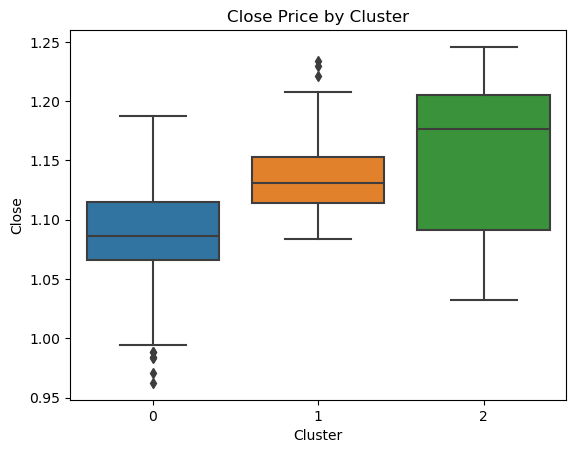

In [194]:
sns.boxplot(x='Cluster', y='Close', data=df_unsupervised)
plt.title('Close Price by Cluster')
plt.show()


C:\Users\48666\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\48666\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\48666\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\48666\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Window

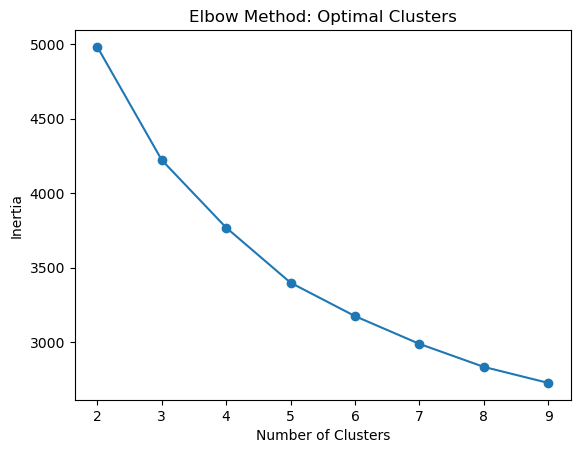

In [195]:
os.environ["OMP_NUM_THREADS"] = "1"
# Elbow method to find optimal n_clusters
inertia = []
cluster_range = range(2, 10)  # Test between 2 and 10 clusters
for k in cluster_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(data_scaled)
    inertia.append(kmeans.inertia_)

# Plot inertia
plt.plot(cluster_range, inertia, marker='o')
plt.title('Elbow Method: Optimal Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

In [196]:
from sklearn.metrics import silhouette_score

kmeans_3 = KMeans(n_clusters=3, random_state=42, n_init=10)
clusters_3 = kmeans_3.fit_predict(data_scaled)
score_3 = silhouette_score(data_scaled, clusters_3)
print(f"Silhouette Score for 3 Clusters: {score_3}")

kmeans_4 = KMeans(n_clusters=4, random_state=42, n_init=10)
clusters_4 = kmeans_4.fit_predict(data_scaled)
score_4 = silhouette_score(data_scaled, clusters_4)
print(f"Silhouette Score for 4 Clusters: {score_4}")


C:\Users\48666\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


Silhouette Score for 3 Clusters: 0.22533356836398988


C:\Users\48666\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


Silhouette Score for 4 Clusters: 0.23182738329076627


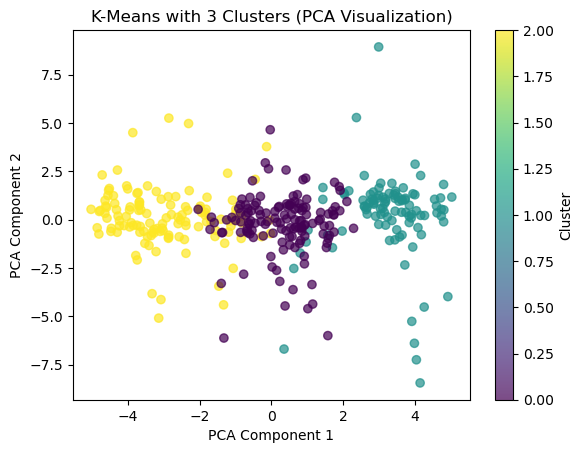

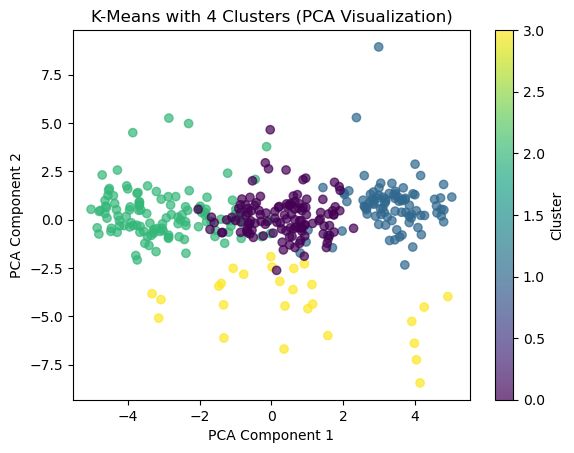

In [197]:
# Visualize 3 clusters
plt.figure()
plt.scatter(data_pca[:, 0], data_pca[:, 1], c=clusters_3, cmap='viridis', alpha=0.7)
plt.title('K-Means with 3 Clusters (PCA Visualization)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar(label='Cluster')
plt.show()

# Visualize 4 clusters
plt.figure()
plt.scatter(data_pca[:, 0], data_pca[:, 1], c=clusters_4, cmap='viridis', alpha=0.7)
plt.title('K-Means with 4 Clusters (PCA Visualization)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar(label='Cluster')
plt.show()


In [198]:
df_unsupervised['Cluster_3'] = clusters_3
df_unsupervised['Cluster_4'] = clusters_4

print("Cluster Summary for 3 Clusters:")
print(df_unsupervised.groupby('Cluster_3').mean())

print("Cluster Summary for 4 Clusters:")
print(df_unsupervised.groupby('Cluster_4').mean())


Cluster Summary for 3 Clusters:
           NonComm_Positions_Long_All  NonComm_Positions_Short_All  \
Cluster_3                                                            
0                       195846.274074                164454.896296   
1                       168404.666667                201054.323232   
2                       227247.640000                 90103.640000   

           Comm_Positions_Long_All  Comm_Positions_Short_All  \
Cluster_3                                                      
0                    378702.874074             437492.370370   
1                    264979.393939             256350.858586   
2                    359546.336000             545298.392000   

           NonRept_Positions_Long_All  NonRept_Positions_Short_All  \
Cluster_3                                                            
0                        81236.740741                 53838.622222   
1                        83844.101010                 59822.979798   
2               

Observations for the 3-Cluster Solution

    Cluster 0 (Largest Positions Long and Short):
        NonComm_Positions_Long_All and NonComm_Positions_Short_All: This cluster has the highest long positions (231,377) and relatively large short positions (90,745).
        Close Price: Lower average close price (1.0842), suggesting lower market values align with higher long positions.
        Change_in_NonComm_Long_All: Small negative change in long positions, indicating this cluster tends to have stable or slightly reduced long positions.

    Cluster 1 (Moderate Positions):
        NonComm_Positions_Long_All and NonComm_Positions_Short_All: Medium long positions (219,177) and short positions (86,354).
        Close Price: Higher average close price (1.1888), suggesting this cluster aligns with rising market trends.
        Change_in_NonComm_Long_All: Small positive change in long positions.

    Cluster 2 (High Short, Low Long):
        NonComm_Positions_Long_All and NonComm_Positions_Short_All: Lowest long positions (193,398) and the highest short positions (171,050).
        Close Price: Close price (1.0895) is moderate, indicating mixed market sentiment.
        Change_in_NonComm_Long_All: Small negative change in long positions.

Summary for 3 Clusters:

    Cluster 0 represents stable or bearish conditions with higher long positions.
    Cluster 1 represents bullish conditions with rising close prices.
    Cluster 2 indicates bearish or mixed market sentiment with high short positions.
    
Observations for the 4-Cluster Solution

    Cluster 0 (High Shorts, Moderate Longs):
        NonComm_Positions_Long_All and NonComm_Positions_Short_All: Lowest long positions (196,340) and highest short positions (180,581).
        Close Price: Moderate close price (1.0892).
        Change_in_NonComm_Long_All: Slightly positive change in long positions, suggesting cautious optimism.

    Cluster 1 (Large Positions):
        NonComm_Positions_Long_All and NonComm_Positions_Short_All: High long positions (231,100) and relatively low short positions (90,567).
        Close Price: Lowest close price (1.0844).
        Change_in_Comm_Long_All: Positive change in long positions.

    Cluster 2 (Low Positions, Volatility):
        NonComm_Positions_Long_All and NonComm_Positions_Short_All: Lowest long positions (183,029) and moderate short positions (113,396).
        Close Price: Slightly higher close price (1.0960).
        Change_in_Comm_Long_All: Significant negative change, suggesting possible high market volatility.

    Cluster 3 (Bullish Market):
        NonComm_Positions_Long_All and NonComm_Positions_Short_All: Moderate long positions (220,202) and low short positions (86,296).
        Close Price: Highest close price (1.1897).
        Change_in_NonComm_Long_All: Positive change, indicating bullish conditions.

Summary for 4 Clusters:

    Cluster 0 shows high short positions, aligning with bearish conditions.
    Cluster 1 represents large positions, likely associated with institutional stability.
    Cluster 2 shows low positions and high volatility, possibly indicating mixed market sentiment.
    Cluster 3 aligns with bullish market conditions and rising prices.

Comparing 3 vs. 4 Clusters

    3 Clusters:
        Simpler and easier to interpret.
        Provides clear segmentation between bullish, bearish, and mixed conditions.
    4 Clusters:
        Adds nuance by separating low positions with volatility (Cluster 2) and high bullish market sentiment (Cluster 3).
        Offers better granularity but is slightly more complex to interpret.
        
Recommendations

    Choose 4 Clusters if:
        You need more detailed segmentation for trading strategies (e.g., handling volatility separately).
        You want to identify nuanced market behaviors.

    Stick to 3 Clusters if:
        Simplicity and interpretability are more important.
        You are satisfied with broader market trends without differentiating volatility.

Next Steps

    Model Development:
        Use cluster labels as features in a supervised learning model to predict market behavior (e.g., Close price movement).

## supervised learning model 

In [199]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [200]:
features = df_unsupervised[['Cluster_3', 'Cluster_4']]  
target = df_unsupervised['Close'] 

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

In [201]:
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)


In [202]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R² Score: {r2}")


Mean Squared Error: 0.001954772276568782
R² Score: 0.2268624550227556


In [203]:
# Feature importance
importance = model.feature_importances_
for i, col in enumerate(features.columns):
    print(f"Feature: {col}, Importance: {importance[i]}")


Feature: Cluster_3, Importance: 0.8407568085791052
Feature: Cluster_4, Importance: 0.1592431914208948


Insights:

    Cluster_4 is More Relevant: The Cluster_4 segmentation provides more useful groupings for predicting the Close price. 
    It might capture differences in the market conditions (e.g., bearish, bullish, or volatile periods) better than Cluster_3.

    Cluster_3 Adds Minimal Value: Since Cluster_3 has low importance, it may not add much value as a predictor. 
    You can consider excluding it or combining it with additional features.

2. Explore Other Models

Test different regression models to compare performance:

    Gradient Boosting (e.g., XGBoost, LightGBM, CatBoost)

In [204]:
from xgboost import XGBRegressor

xgb_model = XGBRegressor(random_state=42)
xgb_model.fit(X_train, y_train)

y_pred_xgb = xgb_model.predict(X_test)

mse_xgb = mean_squared_error(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)
print(f"XGBoost Mean Squared Error: {mse_xgb}")
print(f"XGBoost R² Score: {r2_xgb}")


XGBoost Mean Squared Error: 0.0019311643873327865
XGBoost R² Score: 0.23619967846550372


In [205]:
import lightgbm as lgb
from sklearn.metrics import mean_squared_error, r2_score

# Train a LightGBM Regressor
lgb_model = lgb.LGBMRegressor(random_state=42, n_estimators=100)
lgb_model.fit(X_train, y_train)

# Make predictions
y_pred_lgb = lgb_model.predict(X_test)

# Evaluate the model
mse_lgb = mean_squared_error(y_test, y_pred_lgb)
r2_lgb = r2_score(y_test, y_pred_lgb)

print(f"LightGBM Mean Squared Error: {mse_lgb}")
print(f"LightGBM R² Score: {r2_lgb}")

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000044 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7
[LightGBM] [Info] Number of data points in the train set: 287, number of used features: 2
[LightGBM] [Info] Start training from score 1.122369
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best 

In [206]:
from sklearn.model_selection import GridSearchCV

# Parameter grid
param_grid = {
    'learning_rate': [0.01, 0.05, 0.1],
    'n_estimators': [100, 200, 500],
    'max_depth': [3, 5, 7],
}

grid = GridSearchCV(lgb.LGBMRegressor(force_col_wise=True, random_state=42), param_grid, cv=5, scoring='r2', verbose=2)
grid.fit(X_train, y_train)

# Best parameters and score
print("Best Parameters:", grid.best_params_)
print("Best R² Score:", grid.best_score_)


Fitting 5 folds for each of 27 candidates, totalling 135 fits
[LightGBM] [Info] Total Bins 7
[LightGBM] [Info] Number of data points in the train set: 229, number of used features: 2
[LightGBM] [Info] Start training from score 1.120420
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Wa

In [207]:
importance = lgb_model.feature_importances_
for i, col in enumerate(features.columns):
    print(f"Feature: {col}, Importance: {importance[i]}")


Feature: Cluster_3, Importance: 98
Feature: Cluster_4, Importance: 150
